In [1]:
options(stringsAsFactors=FALSE)

In [2]:
library(data.table)
library(cowplot)
library(Matrix)
library(BuenColors)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: MASS


In [3]:
metrics_pctcells = read.csv('./peaks_frequency_results/metrics/clustering_scores.csv',
                         row.names=1)
metrics_pctcells[['cutoff']] = as.numeric(substring(rownames(metrics_pctcells),8))

metrics_nreads = read.csv('./peaks_intensity_results/metrics/clustering_scores.csv',
                         row.names=1)
metrics_nreads[['cutoff']] = as.numeric(substring(rownames(metrics_pctcells),8))

In [4]:
head(metrics_nreads)

,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,cutoff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
control1,0.1798257,0.02340956,0.03147719,0.3491278,0.03087914,0.05879042,0.3623564,0.03240734,0.05400627,1.0
control0.8,0.1982690,0.02366031,0.02252971,0.3673888,0.03005865,0.04759717,0.3842573,0.03194742,0.04510479,0.8
control0.6,0.1525577,0.02373265,0.04226153,0.3218832,0.03044966,0.07240744,0.3332924,0.03214942,0.06468896,0.6
control0.4,0.1467428,0.02358605,0.02748601,0.3180211,0.03048412,0.04023531,0.3325563,0.03209846,0.04007197,0.4
control0.2,0.1827376,0.02464559,0.02318163,0.3473605,0.03733281,0.04130831,0.3612750,0.04033575,0.04051665,0.2
control0.1,0.1335449,0.02610129,0.01613601,0.2671547,0.04700872,0.04252158,0.2833818,0.04713078,0.04115773,0.1


In [5]:
head(metrics_pctcells)

,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,cutoff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
control1,0.1798257,0.02340956,0.03147719,0.3491278,0.03087914,0.05879042,0.3623564,0.03240734,0.05400627,1.0
control0.8,0.1845791,0.02378315,0.03073177,0.3592863,0.03037382,0.04301433,0.3746742,0.03207133,0.04254816,0.8
control0.6,0.1552175,0.02355923,0.03070150,0.3263211,0.03040637,0.05113084,0.3232072,0.03212291,0.04960514,0.6
control0.4,0.1779127,0.02393389,0.03377330,0.3418161,0.03078522,0.04625892,0.3558443,0.03239138,0.04501932,0.4
control0.2,0.2025472,0.02358605,0.01427758,0.3688490,0.03048412,0.03375549,0.3852160,0.03209846,0.03361023,0.2
control0.1,0.1293318,0.02253565,0.02879526,0.2620575,0.02964576,0.04539928,0.2779832,0.03145097,0.04467698,0.1


In [6]:
df_merge = rbind(metrics_pctcells,metrics_nreads)

In [7]:
df_merge[['group']] = c(rep('Fequency',dim(metrics_pctcells)[1]),rep('Intensity',dim(metrics_nreads)[1]))

In [8]:
df_merge[['ID']] = rownames(df_merge)

In [9]:
df_merge_new = data.frame(name=character(0),group= character(0), clustering= character(0), 
                          metric = character(0),value = numeric(0),cutoff=numeric(0),stringsAsFactors=FALSE)

In [10]:
for(x in rownames(df_merge)){
    for (y in colnames(df_merge)[1:9]){
        str_split = strsplit(y,'_')[[1]]
        x_metric = str_split[1]
        x_clustering = str_split[2]
        x_value = df_merge[x,y]
        new_row = list(name=x,group=df_merge[x,'group'],clustering=x_clustering,
                       metric=x_metric,value=x_value,cutoff=df_merge[x,'cutoff'])
        df_merge_new = rbind(df_merge_new,new_row)
    }
}

In [11]:
df_merge_new[df_merge_new=="louvain"]<-'Louvain'
df_merge_new[df_merge_new=="hc"]<-'HC'

In [12]:
df_merge_new

name,group,clustering,metric,value,cutoff
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
control1,Fequency,Louvain,ARI,0.17982566,1.0
control1,Fequency,kmeans,ARI,0.02340956,1.0
control1,Fequency,HC,ARI,0.03147719,1.0
control1,Fequency,Louvain,AMI,0.34912784,1.0
control1,Fequency,kmeans,AMI,0.03087914,1.0
control1,Fequency,HC,AMI,0.05879042,1.0
control1,Fequency,Louvain,Homogeneity,0.36235641,1.0
control1,Fequency,kmeans,Homogeneity,0.03240734,1.0
control1,Fequency,HC,Homogeneity,0.05400627,1.0


In [13]:
min(df_merge_new$value)

[1] 0.01427758

In [14]:
p <- ggplot(df_merge_new, aes(cutoff, value,color=factor(group))) + 
        geom_point(size=2,alpha=0.8)+
        geom_line(size=1.5,alpha=0.8) + 
        theme_bw() +
        theme(legend.position='top',
              text = element_text(colour = "black"),
              axis.text.x = element_text(color = "black"),
              axis.text.y = element_text(color = "black"),
              axis.title.x = element_text(color = 'black'),
              axis.title.y = element_text(color = 'black')) +
        xlab('Cutoff') + ylab('Score')+
        ylim(-0.05, 1)+
        labs(color='peak selection')+
        scale_x_reverse()

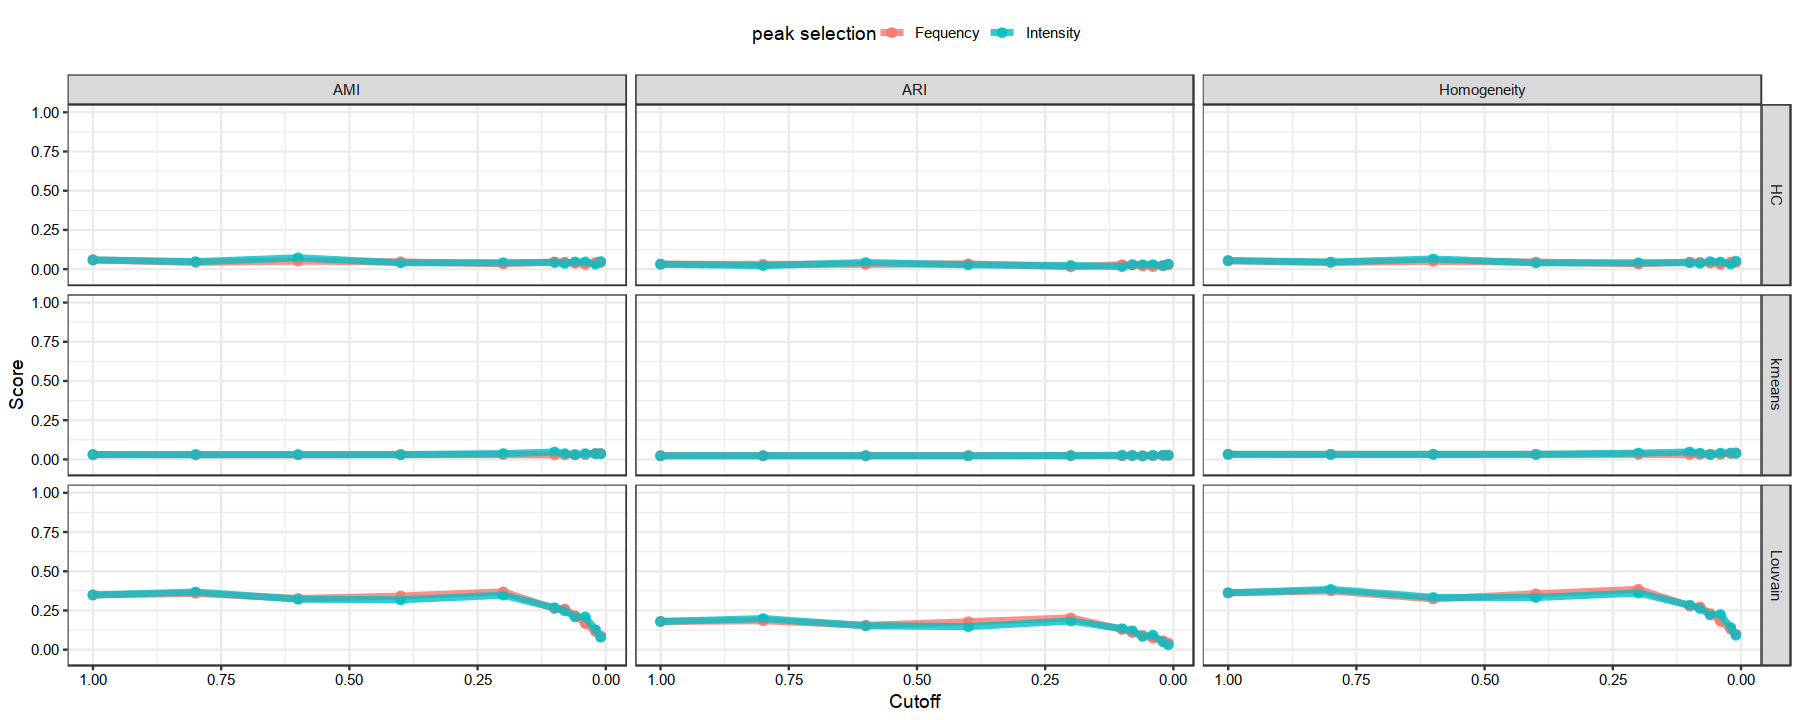

In [15]:
options(repr.plot.width=3*5, repr.plot.height=3*2)
p + facet_grid(vars(clustering), vars(metric))

In [16]:
ggsave(p + facet_grid(vars(clustering), vars(metric)),filename = 'Control_buenrostro.pdf',width = 3*5, height = 3*2)